# Load the Data Using Panda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv("velocitiesblock01.txt", header=None)

In [3]:
df.head(10)

,0,1,2
0,gvel: 0.0,0.0,0.000
1,gvel: 0.0,0.0,-0.049
2,gvel: 0.037,-0.0,-0.052
3,gvel: 0.068,-0.0,-0.064
4,gvel: 0.095,-0.0,-0.080
5,gvel: 0.12,-0.0,-0.098
6,gvel: 0.145,-0.0,-0.118
7,gvel: 0.145,-0.0,-0.167
8,gvel: 0.181,0.0,-0.171
9,gvel: 0.211,0.0,-0.183


In [4]:
step = df.index.values
step[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values

In [6]:
v_x[:10]

array([0.   , 0.   , 0.037, 0.068, 0.095, 0.12 , 0.145, 0.145, 0.181,
       0.211])

In [7]:
v_z = df[2].apply(float).values

In [8]:
v_z[:10]

array([ 0.   , -0.049, -0.052, -0.064, -0.08 , -0.098, -0.118, -0.167,
       -0.171, -0.183])

# Get the Velocity Magnitude

In [9]:
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

In [10]:
v[:10]

array([0.        , 0.049     , 0.06382006, 0.09338094, 0.12419742,
       0.15493224, 0.18694652, 0.2211651 , 0.24900201, 0.2793027 ])

# Plot the X, Z components and Magnitude

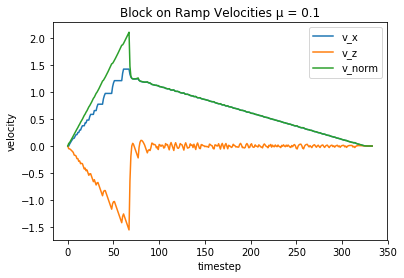

In [11]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Block on Ramp Velocities μ = 0.1")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");

# Repeat For Sphere

Sphere starts at same coordinates as block and has diameter = 0.025, which is also width and height of block (depth is 0.05)

In [12]:
df =  pd.read_csv("velocitiessphere01.txt", header=None)

In [13]:
step = df.index.values
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values
v_z = df[2].apply(float).values
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

## Plot it

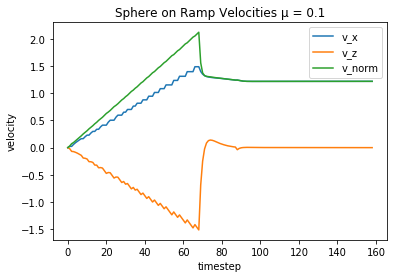

In [14]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.1")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");

# Try to Limit Bouncing of Sphere

Taking a closer look at z-component of velocity, we see, it dosn't actually go to exactly zero after it exits the ramp, but rather there is some bouncing effect.

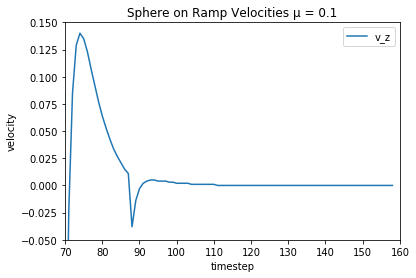

In [15]:
fig, ax = plt.subplots()
ax.plot(step, v_z, label="v_z")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.1")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep")
ax.set_xlim(70, 160)
ax.set_ylim(-0.05, 0.15);

In [16]:
df.iloc[70:95][2]

70   -0.248
71   -0.023
72    0.085
73    0.129
74    0.140
75    0.135
76    0.123
77    0.107
78    0.092
79    0.077
80    0.064
81    0.053
82    0.043
83    0.034
84    0.027
85    0.021
86    0.015
87    0.011
88   -0.038
89   -0.014
90   -0.003
91    0.002
92    0.004
93    0.005
94    0.005
Name: 2, dtype: float64

In [17]:
df.iloc[110:120][2]

110    0.001
111    0.000
112    0.000
113    0.000
114    0.000
115    0.000
116    0.000
117    0.000
118    0.000
119    0.000
Name: 2, dtype: float64

The initial bounce druves the z-component of velocity up to 0.140 at t=74. Then the sphere starts slowing down, but is still travelling upward until t=88. The sphere makes one more bounce, but then hits a resting velocity at t=111

# Turn on Condim = 6 to Provide Rotational Friction

In [18]:
df =  pd.read_csv("velocitiessphere02.txt", header=None)
step = df.index.values
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values
v_z = df[2].apply(float).values
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

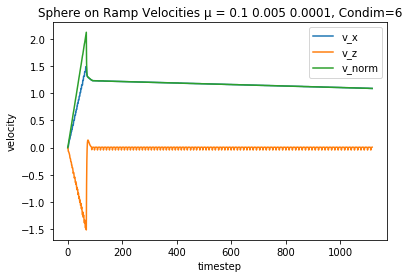

In [19]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.1 0.005 0.0001, Condim=6")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");

Bouncing is noticeably worse, and does not converge to 0 well after 1000 time steps. Try increasing other friction components.

# Increase All Friction Params and Ball stops, but still bounces

In [20]:
df =  pd.read_csv("velocitiessphere03.txt", header=None)
step = df.index.values
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values
v_z = df[2].apply(float).values
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

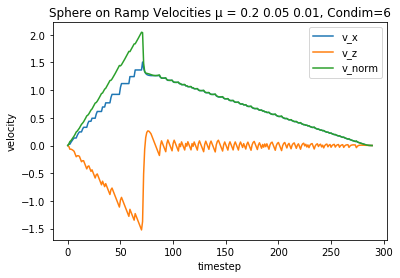

In [21]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.2 0.05 0.01, Condim=6")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");

Indeed, bouncing seems worse here. Sphere even bounces as it falls down ramp. Let's actually decrease rotational and torsional frictions.

In [22]:
df =  pd.read_csv("velocitiessphere04.txt", header=None)
step = df.index.values
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values
v_z = df[2].apply(float).values
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

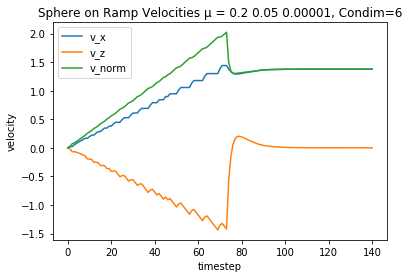

In [23]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.2 0.05 0.00001, Condim=6")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");

Let's try to eliminate bouncing on the ramp

In [24]:
df =  pd.read_csv("velocitiessphere05.txt", header=None)
step = df.index.values
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values
v_z = df[2].apply(float).values
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

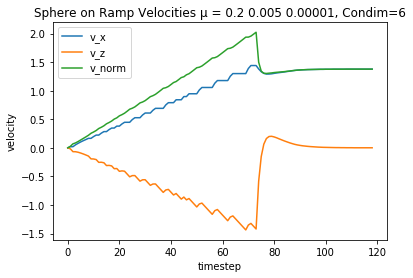

In [25]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.2 0.005 0.00001, Condim=6")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");

# Try Placing Primitive Pupper on the Ramp

In [26]:
df =  pd.read_csv("velocitiesprimitivepupper.txt", header=None)
step = df.index.values
v_x = df[0].apply(lambda x: float(x.strip('gvel: '))).values
v_z = df[2].apply(float).values
df[3] = np.sqrt(v_x**2 + v_z**2)
v = df[3].values

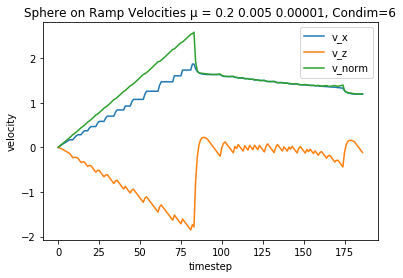

In [27]:
fig, ax = plt.subplots()
ax.plot(step, v_x, label="v_x")
ax.plot(step, v_z, label="v_z")
ax.plot(step, v, label="v_norm")
ax.legend()
ax.set_title("Sphere on Ramp Velocities μ = 0.2 0.005 0.00001, Condim=6")
ax.set_ylabel("velocity")
ax.set_xlabel("timestep");